In [ ]:
import zipfile
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
working_dir = os.getcwd()
print(f"You are now working in {working_dir}")
print("If you need to change to the parent directory, run the cell below")

You are now working in c:\Users\fredd\Desktop\Studier\Project5\flowers\flowers_CNN\jupyter_notebooks
If you need to change to the parent directory, run the cell below


In [4]:
os.chdir(os.path.dirname(working_dir))
working_dir = os.getcwd()
print(f"You have now changed your working directory to {working_dir}")

You have now changed your working directory to c:\Users\fredd\Desktop\Studier\Project5\flowers\flowers_CNN


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

In [ ]:
KaggleDatasetPath = "kurito/flower-photos"
DestinationFolder = "inputs/dataset/raw"
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

In [ ]:
DestinationFolder = "inputs/dataset/raw"
KaggleJsonPath = "kaggle.json"

# This will find the zip-file in the DestinationFolder and unzip
for zip_path in glob.glob(f"{DestinationFolder}/*.zip"):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(DestinationFolder)
    os.remove(zip_path)  # Removes zip-file after unpacking

if os.path.exists(KaggleJsonPath):
    os.remove(KaggleJsonPath) # This will remove the kaggle.json file when unzipping the files are done

In [5]:
version = 'v2'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(working_dir) and version in os.listdir(working_dir + '/outputs'):
    print("This version already exists, create a new version if you are working on a new version")
    pass
else:
    os.makedirs(name=file_path, exist_ok=True)

This version already exists, create a new version if you are working on a new version


In [8]:
import pickle

labels = os.listdir("inputs/dataset/raw/flower_photos")

print(f"Flower labels: {labels}")

with open(f"{file_path}/labels.pkl", "wb") as file:
    pickle.dump(labels, file)
    
print("Labels saved as labels.pkl")

Flower labels: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Labels saved as labels.pkl


daisy: 5064 images
dandelion: 7184 images
roses: 5128 images
sunflowers: 5592 images
tulips: 6392 images




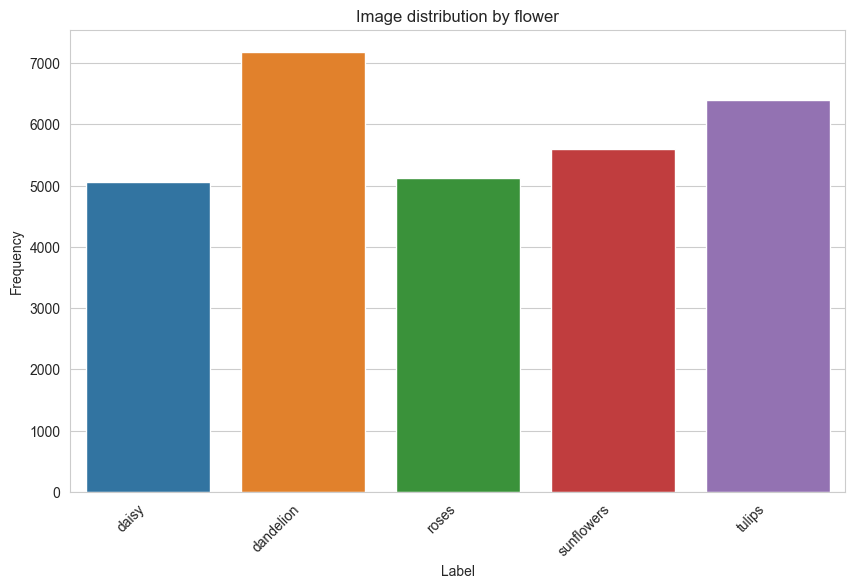

In [11]:
image_dirs = 'inputs/dataset/raw/flower_photos'
labels = os.listdir(image_dirs)
data = []


for label in os.listdir(image_dirs):
    label_path = os.path.join(image_dirs, label)
    
    if os.path.isdir(label_path):
        frequency = len(os.listdir(label_path))
        
        data.append({
            'Label': label,
            'Frequency': frequency
        })
        
        print(f"{label}: {frequency} images")
    
    
df_freq = pd.DataFrame(data)

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_freq, x='Label', y='Frequency', hue='Label')
plt.xticks(rotation=45, ha='right')
plt.title("Image distribution by flower")
plt.savefig(f'{file_path}/labels_distribution_raw.png', bbox_inches='tight', dpi=150)
plt.show()